In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

In [3]:
df = pd.read_csv('diabetes.csv')
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [4]:
#intentionally deleting data from dataset
np.random.seed(42) #setting a random seed for reproducibility

missing_percentage = 0.1 #introducing missing values randomly, sets the percentage of cells that will be converted to missing values, set to 10% (0.1)
total_cells = df.size #calculating the total number of elements in the dataset
n_missing = int(np.floor(missing_percentage * total_cells)) #calculating how many cells should be set to NaN based on the given percentage.

for _ in range(n_missing): #this loop runs n_missing times, each time selecting a random cell to set as NaN
    ix = (np.random.randint(0, df.shape[0]), np.random.randint(0, df.shape[1])) #This generates a random integer between 0 and the number of rows in the 
    #DataFrame, and then a random integer between 0 and the number of columns in the DataFrame.
    df.iat[ix] = np.nan #sets the cell at the randomly chosen row and column index to NaN

# 1. load/read and display the dataset (with missing values)
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0            NaN           35.0      0.0   NaN   
1            NaN      NaN           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0      NaN            NaN           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      0.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0            0.0      0.0   NaN   
767          1.0     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0      1.0  
1                

In [5]:
# 2. identify duplicates
print(df.isnull().sum())

Pregnancies                 75
Glucose                     65
BloodPressure               85
SkinThickness               70
Insulin                     69
BMI                         64
DiabetesPedigreeFunction    69
Age                         85
Outcome                     68
dtype: int64


In [6]:
# 3. handle data redundancy (drop the records with duplicates)
print(df.dropna())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
5            5.0    116.0           74.0            0.0      0.0  25.6   
13           1.0    189.0           60.0           23.0    846.0  30.1   
17           7.0    107.0           74.0            0.0      0.0  29.6   
..           ...      ...            ...            ...      ...   ...   
762          9.0     89.0           62.0            0.0      0.0  22.5   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      0.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
767          1.0     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
2                       0.672  32.0      1.0  
3                

In [7]:
# 4. perform correlation analysis (Pearson's ratio)
correlation_matrix = df.corr()
print(correlation_matrix)
# corr() method by default caluclates Pearson's ratio

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.135940       0.132203      -0.086626   
Glucose                      0.135940  1.000000       0.122363       0.067591   
BloodPressure                0.132203  0.122363       1.000000       0.225471   
SkinThickness               -0.086626  0.067591       0.225471       1.000000   
Insulin                     -0.082420  0.349349       0.085425       0.425300   
BMI                          0.011037  0.226383       0.291673       0.413992   
DiabetesPedigreeFunction    -0.004487  0.147052       0.052280       0.185540   
Age                          0.552135  0.247988       0.251978      -0.093223   
Outcome                      0.219136  0.451413       0.041653       0.061166   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.082420  0.011037                 -0.004487   
Glucose                   0.349349  0.226

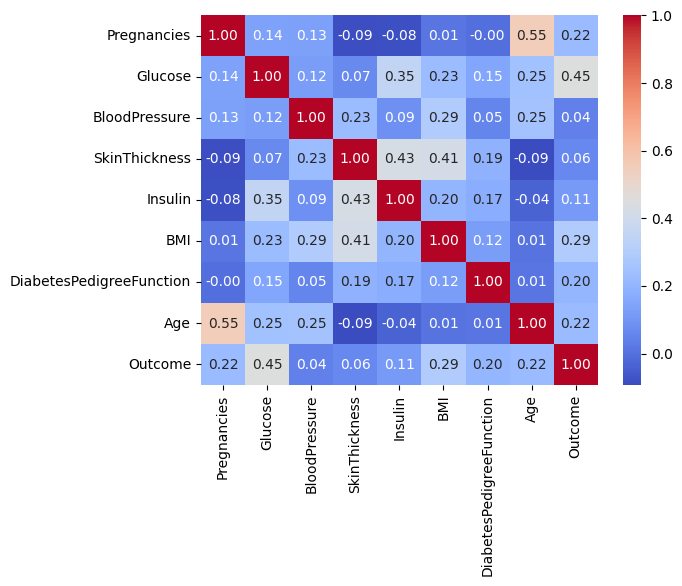

In [8]:
# 5. display the heat map #called multivariate analysis, as compared to univariate analysis (i.e., histogram)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.show()

In [9]:
# 6. data visualization techniques, at least 4 different graphs

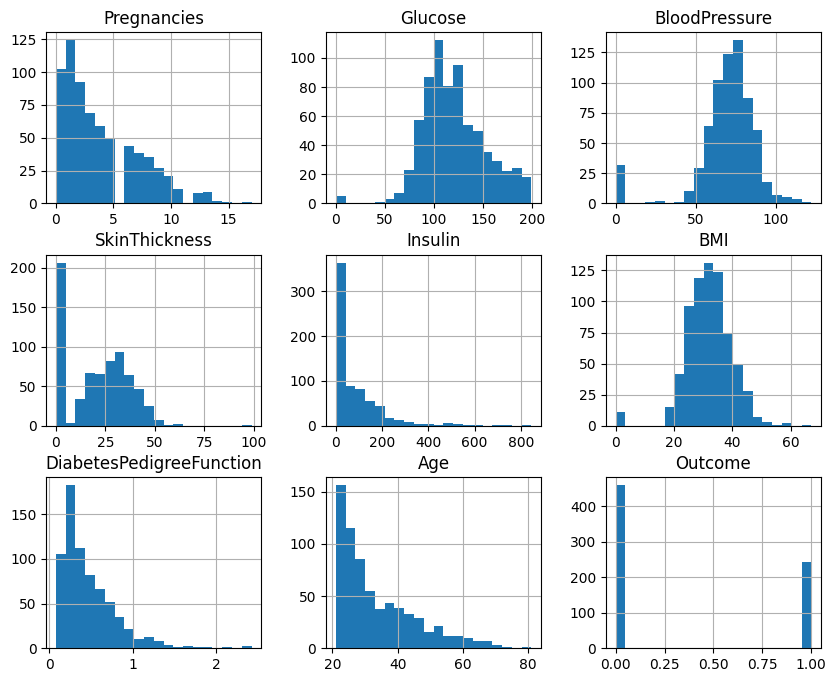

In [10]:
# 6.1 Histogram - to visualize distribution of a single variable
df.hist(figsize=(10, 8), bins=20)
plt.show()

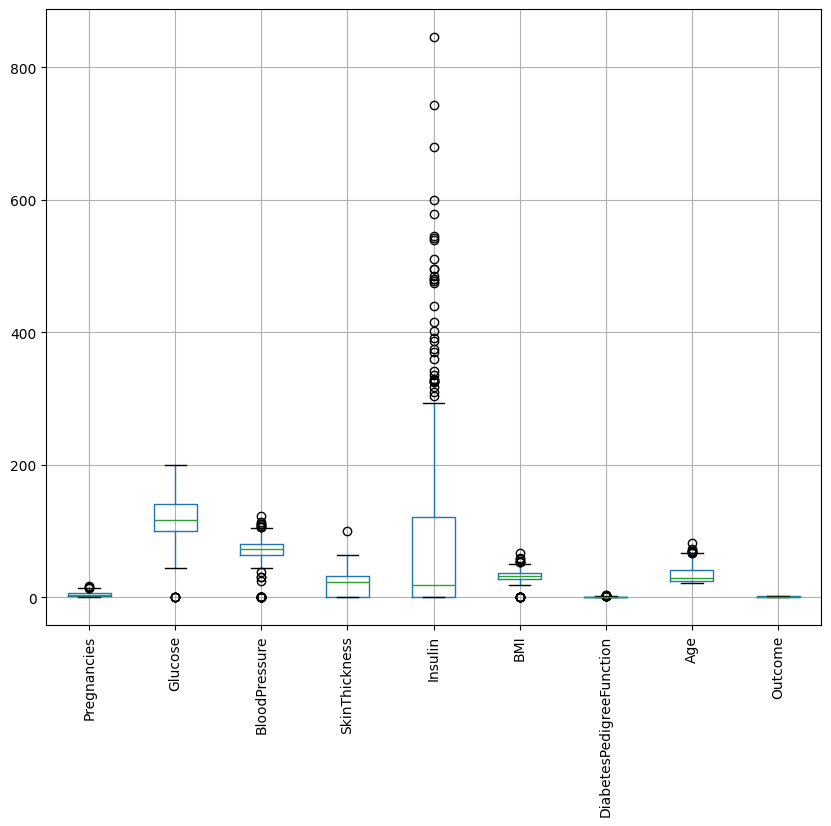

In [11]:
# 6.2 Box Plot - Visualizes the distribution of data based on five summary statistics: minimum, 
#first quartile (Q1), (Q2) median, third quartile (Q3), and maximum
df.boxplot(figsize=(10, 8))
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

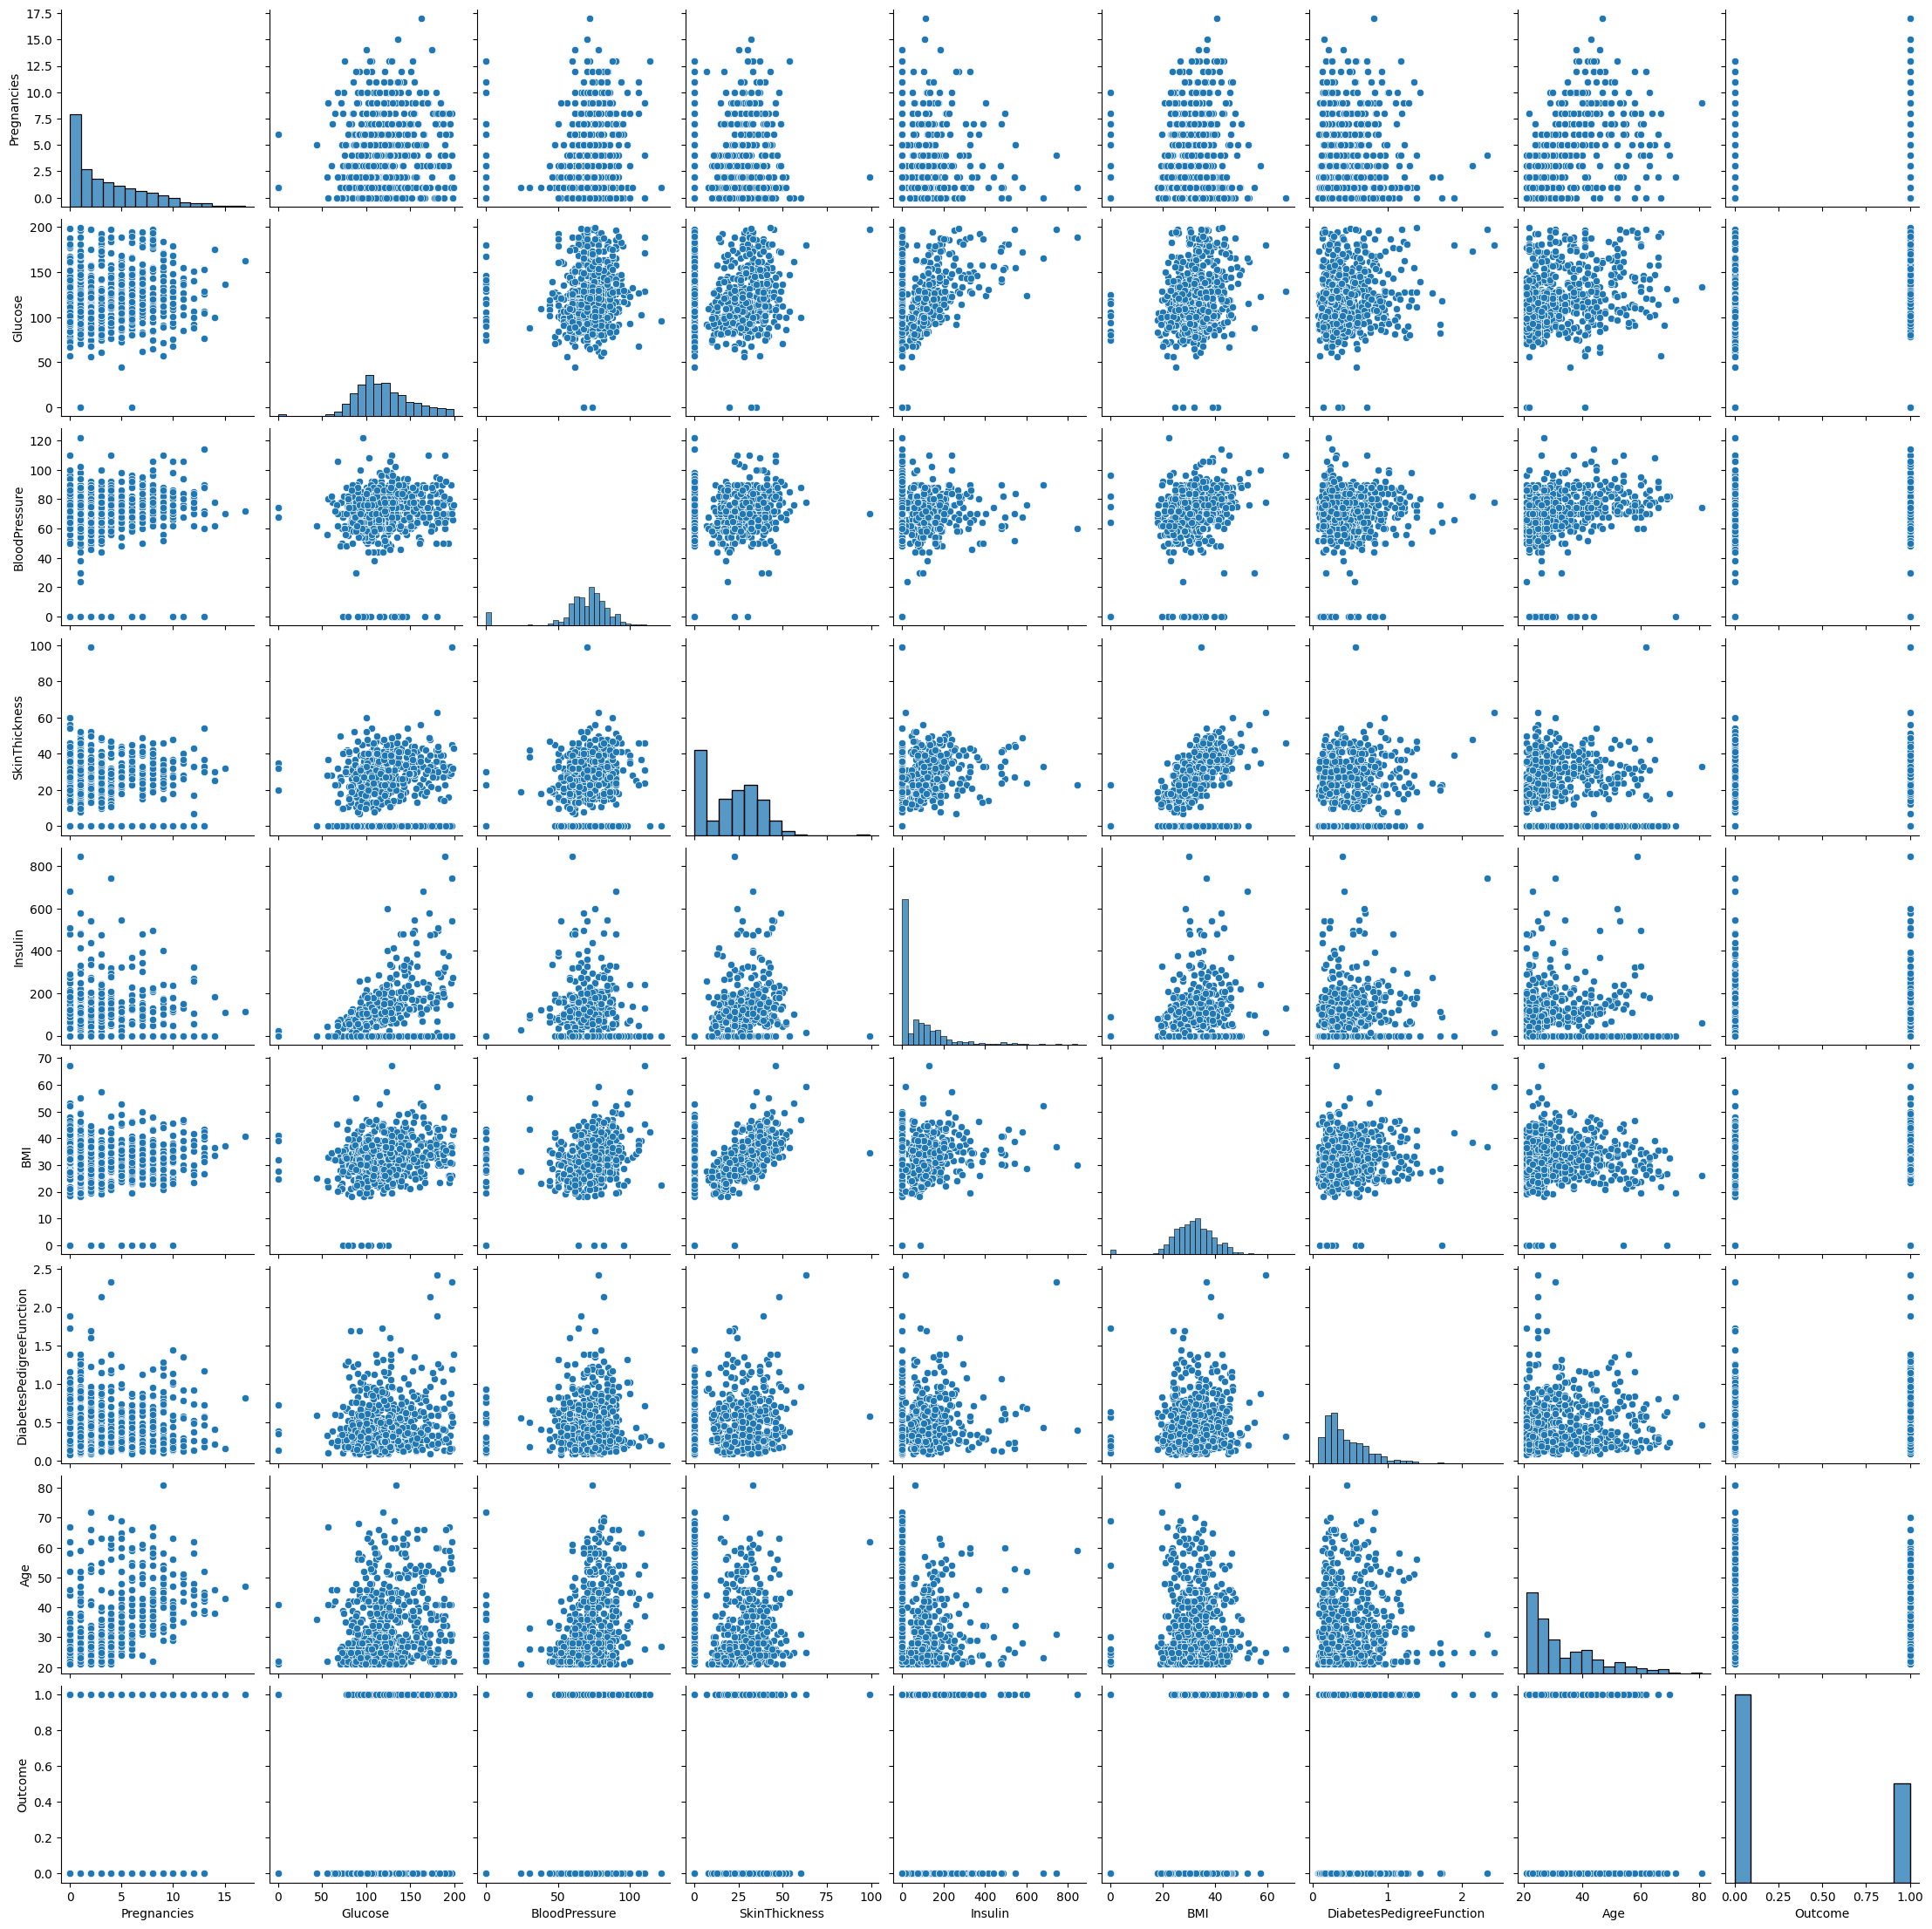

In [12]:
# 6.3 Pair Plot - Visualizes the pairwise relationships between different variables in the dataset
sns.pairplot(df)
plt.show()

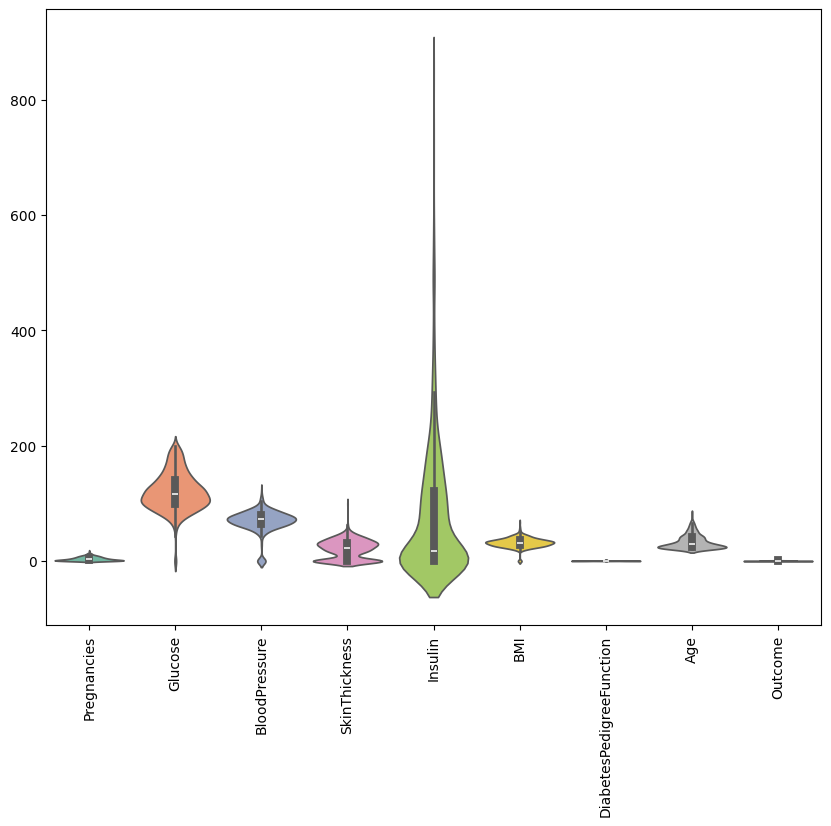

In [13]:
# 6.4 Violin Plot - Combines aspects of box plots and kernel density plots
plt.figure(figsize=(10, 8))
sns.violinplot(data=df, palette='Set2')
plt.xticks(rotation=90)
plt.show()

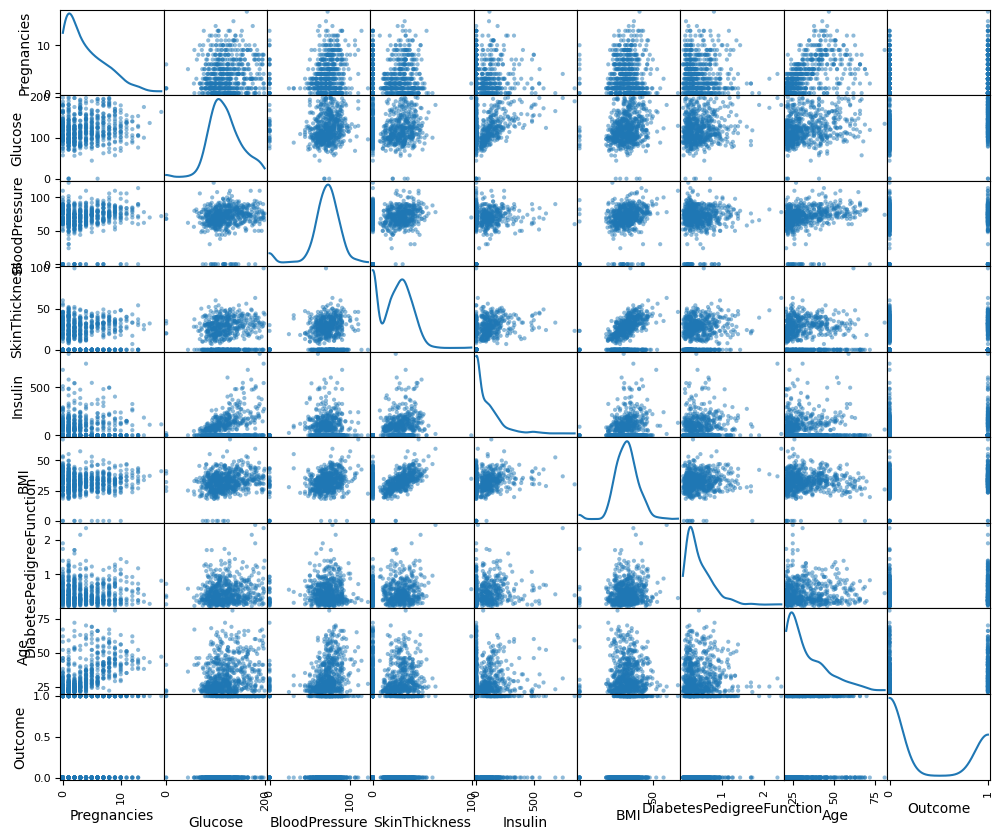

In [14]:
# 6.5 Scatter Plot Matrix - Visualizes the relationships between pairs of numerical variables
pd.plotting.scatter_matrix(df, figsize=(12, 10), diagonal='kde')
plt.show()

In [15]:
# 7. perform min-max scaling
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns) # this fits and scales the data

print(df_scaled)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719            NaN       0.353535  0.000000       NaN   
1            NaN       NaN       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000       NaN            NaN       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.507538       0.622951       0.484848  0.212766  0.490313   
764     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
765     0.294118  0.608040       0.590164       0.232323  0.132388  0.390462   
766     0.058824  0.633166       0.491803       0.000000  0.000000       NaN   
767     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction       Age

In [16]:
# 8. perform z-score scaling
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print(df_scaled)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.637248  0.855270            NaN       0.898060 -0.675746       NaN   
1            NaN       NaN      -0.163284       0.524381 -0.675746 -0.676517   
2       1.226066  1.942585      -0.265740      -1.281732 -0.675746 -1.088925   
3      -0.834795 -0.977634      -0.163284       0.150703  0.137615 -0.489059   
4      -1.129204       NaN            NaN       0.898060  0.777921  1.385520   
..           ...       ...            ...            ...       ...       ...   
763     1.814883 -0.604840       0.348995       1.707697  0.881754  0.110806   
764    -0.540387  0.047549       0.041627       0.399822 -0.675746  0.598197   
765     0.342840  0.016483       0.144083       0.150703  0.293365 -0.726506   
766    -0.834795  0.171814      -0.470652      -1.281732 -0.675746       NaN   
767    -0.834795 -0.853369       0.041627       0.648941 -0.675746 -0.201624   

     DiabetesPedigreeFunction       Age

In [17]:
#9. perform data smoothing using binning method

In [18]:
# 9.1 performing equal-depth binning and mean smoothing
# example: smoothing the 'Age' column using binning
num_bins = 5
df['Age_Binned'] = pd.cut(df['Age'], bins=num_bins)
df['Age_Smoothed'] = df.groupby('Age_Binned')['Age'].transform('mean')

print(df[['Age', 'Age_Binned', 'Age_Smoothed']])


C:\Users\khush\AppData\Local\Temp\ipykernel_16568\1862352590.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Age_Smoothed'] = df.groupby('Age_Binned')['Age'].transform('mean')


      Age     Age_Binned  Age_Smoothed
0    50.0   (45.0, 57.0]     50.808824
1    31.0  (20.94, 33.0]     25.489461
2    32.0  (20.94, 33.0]     25.489461
3    21.0  (20.94, 33.0]     25.489461
4    33.0  (20.94, 33.0]     25.489461
..    ...            ...           ...
763  63.0   (57.0, 69.0]     62.470588
764  27.0  (20.94, 33.0]     25.489461
765  30.0  (20.94, 33.0]     25.489461
766  47.0   (45.0, 57.0]     50.808824
767  23.0  (20.94, 33.0]     25.489461

[768 rows x 3 columns]


In [19]:
# 9.2 median binning=
df['Age_Smoothed_Median'] = df.groupby('Age_Binned')['Age'].transform('median')

print(df[['Age', 'Age_Binned', 'Age_Smoothed_Median']])

C:\Users\khush\AppData\Local\Temp\ipykernel_16568\2633083899.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Age_Smoothed_Median'] = df.groupby('Age_Binned')['Age'].transform('median')


      Age     Age_Binned  Age_Smoothed_Median
0    50.0   (45.0, 57.0]                 51.0
1    31.0  (20.94, 33.0]                 25.0
2    32.0  (20.94, 33.0]                 25.0
3    21.0  (20.94, 33.0]                 25.0
4    33.0  (20.94, 33.0]                 25.0
..    ...            ...                  ...
763  63.0   (57.0, 69.0]                 62.0
764  27.0  (20.94, 33.0]                 25.0
765  30.0  (20.94, 33.0]                 25.0
766  47.0   (45.0, 57.0]                 51.0
767  23.0  (20.94, 33.0]                 25.0

[768 rows x 3 columns]


In [20]:
# 9.3 boundary binning
df['Age_Smoothed_Boundary'] = df['Age'].copy()
bin_edges = pd.cut(df['Age'], bins=num_bins, retbins=True)[1]

df['Age_Smoothed_Boundary'] = df['Age_Smoothed_Boundary'].apply(
    lambda x: min(bin_edges, key=lambda edge: abs(edge - x))
)

print(df[['Age', 'Age_Smoothed_Boundary']])

      Age  Age_Smoothed_Boundary
0    50.0                  45.00
1    31.0                  33.00
2    32.0                  33.00
3    21.0                  20.94
4    33.0                  33.00
..    ...                    ...
763  63.0                  57.00
764  27.0                  33.00
765  30.0                  33.00
766  47.0                  45.00
767  23.0                  20.94

[768 rows x 2 columns]


In [21]:
# 10. perform feature selection to select most significant features and display the same using a visualization technique

#first, removing missing values
df_cleaned = df.dropna()
print(df_cleaned.dtypes)

Pregnancies                  float64
Glucose                      float64
BloodPressure                float64
SkinThickness                float64
Insulin                      float64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                          float64
Outcome                      float64
Age_Binned                  category
Age_Smoothed                 float64
Age_Smoothed_Median          float64
Age_Smoothed_Boundary        float64
dtype: object


In [22]:
# converting data types
le = LabelEncoder()
df_cleaned['Age_Binned'] = le.fit_transform(df_cleaned['Age_Binned'])

print(df_cleaned.dtypes)

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                     float64
Age_Binned                    int64
Age_Smoothed                float64
Age_Smoothed_Median         float64
Age_Smoothed_Boundary       float64
dtype: object


C:\Users\khush\AppData\Local\Temp\ipykernel_16568\2366826278.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age_Binned'] = le.fit_transform(df_cleaned['Age_Binned'])


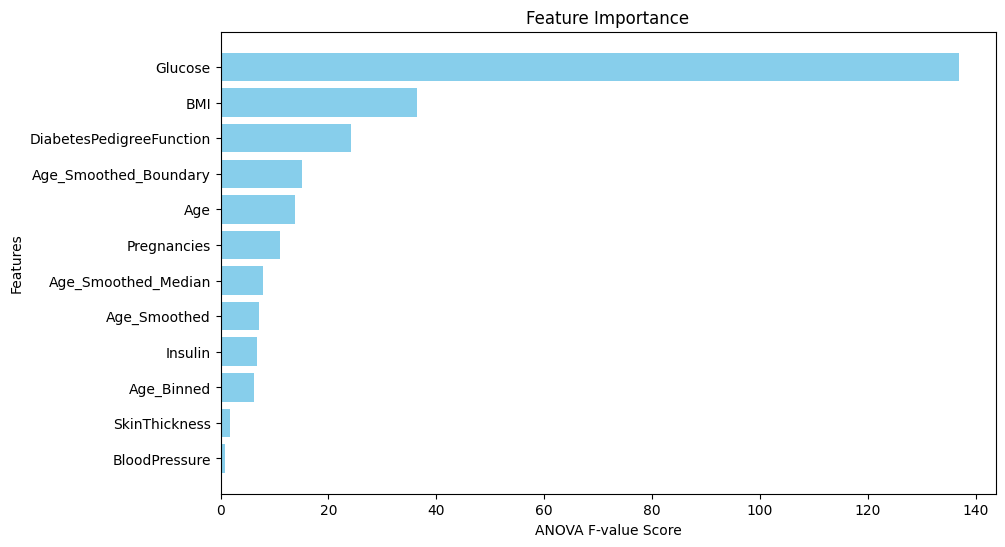

In [23]:
# update feature selection
X = df_cleaned.drop(columns=['Outcome'])  
y = df_cleaned['Outcome']                

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

feature_scores = selector.scores_

feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_scores_df['Feature'], feature_scores_df['Score'], color='skyblue')
plt.xlabel('ANOVA F-value Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()